In [1]:
import numpy as np
import cv2 as cv
import pickle
import matplotlib.pyplot as plt

from MNIST_data.mnist_data import get_test_data

Attempting to read test.pkl
Data read from test.pkl


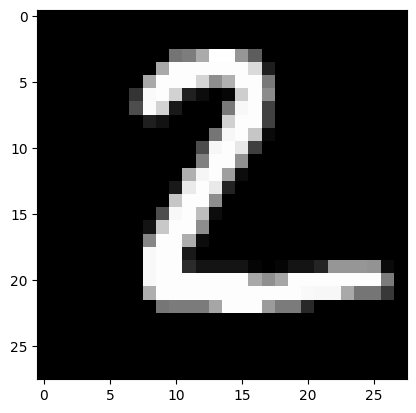

In [3]:
images, labels = get_test_data()
test_image = images[0]
plt.imshow(test_image, cmap='gray')

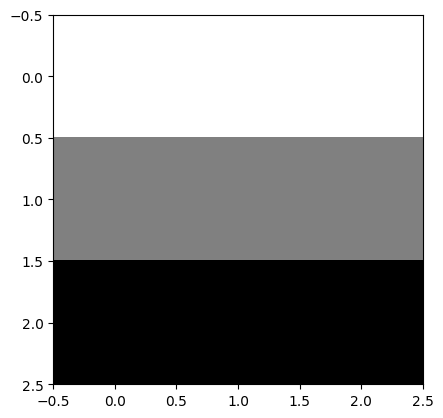

In [54]:
kernel = np.array(
    [[1,0,-1],
     [1,0,-1],
     [1,0,-1]]).T
plt.imshow(kernel, cmap='gray')

In [99]:
def convolve(image, kernel, padding=0, stride=1):
    # Pad the input image with zeros if necessary
    if padding > 0:
        image = np.pad(image, padding, 'constant')
    
    # Get the dimensions of the input image and kernel
    i_h, i_w = image.shape
    k_h, k_w = kernel.shape
    
    # Calculate the output dimensions
    o_h = int(((i_h - k_h + 2 * padding) / stride) + 1)
    o_w = int(((i_w - k_w + 2 * padding) / stride) + 1)
    
    # Create an output array of the correct dimensions
    output = np.zeros((o_h, o_w))
    
    # Perform the convolution
    for i in range(0, i_h - k_h + 1, stride):
        for j in range(0, i_w - k_w + 1, stride):
            output[i//stride, j//stride] = np.sum(image[i:i+k_h, j:j+k_w] * kernel)
    
    return output

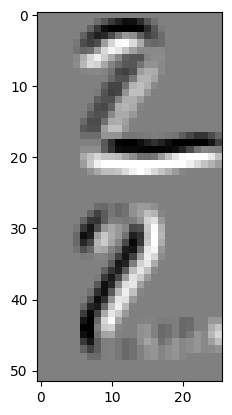

In [113]:
kernels = [kernel, kernel.T]

result = []
for kernel in kernels:
    result.append(convolve(test_image,kernel))
    
result = np.array(result)
plt.imshow(result.reshape(result.shape[0]*result.shape[1],result.shape[2]), cmap='gray')

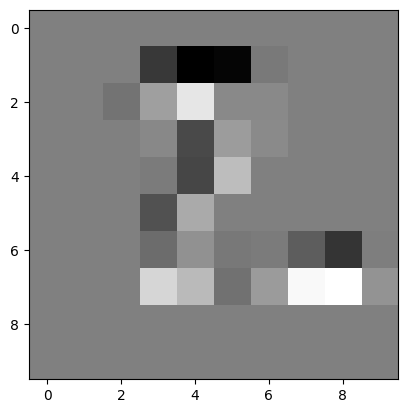

In [107]:
output = convolve(test_image,kernel,1,3)


plt.imshow(output, cmap='gray')
